In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [56]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Konara\\Documents\\GitHub\\DNN\\CNN\\potato disease\\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
) 

Found 2152 files belonging to 3 classes.


In [26]:
class_names=dataset.class_names

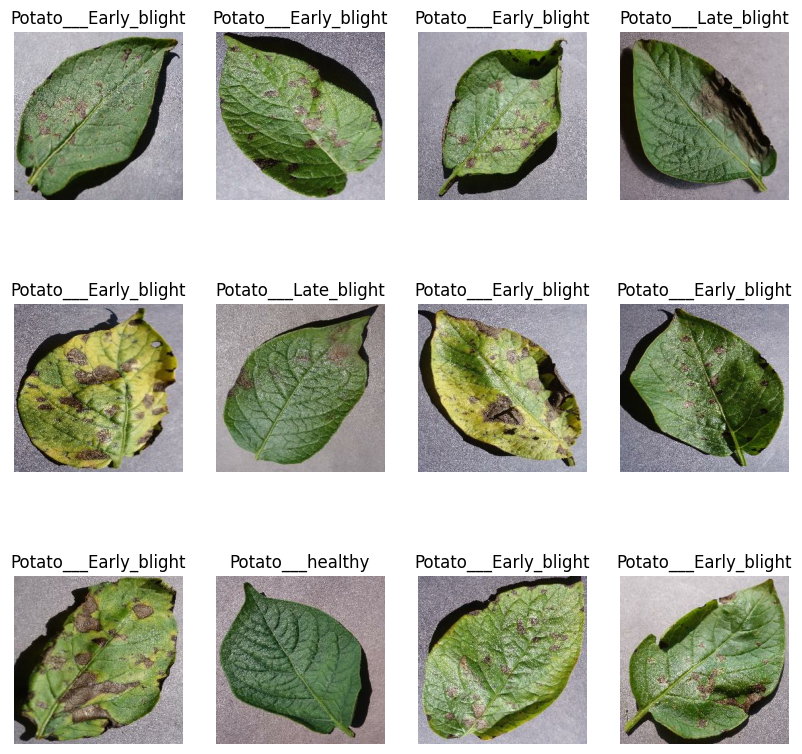

In [29]:
plt.figure(figsize=(10,10))
for img_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [30]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [31]:
train_ds=dataset.take(54)
len(train_ds)

54

In [32]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [33]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [34]:
val_ds=test_ds.take(6)


In [35]:
test_ds=test_ds.skip(6)

In [46]:
def get_dataset_partitons(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds



In [47]:
train_ds,val_ds,test_ds=get_dataset_partitons(dataset)

In [49]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

In [50]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

In [53]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [54]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [57]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

c:\Users\Konara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [60]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4297 - loss: 0.9780 - val_accuracy: 0.5781 - val_loss: 0.8368
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 829ms/step - accuracy: 0.7068 - loss: 0.6679 - val_accuracy: 0.8177 - val_loss: 0.6083
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 44s 807ms/step - accuracy: 0.8319 - loss: 0.4582 - val_accuracy: 0.8438 - val_loss: 0.3942
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8198 - loss: 0.4050 - val_accuracy: 0.9271 - val_loss: 0.2038
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9450 - loss: 0.1609 - val_accuracy: 0.7083 - val_loss: 0.8763
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9161 - loss: 0.2143 - val_accuracy: 0.8281 - val_loss: 0.4220
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.9343 - loss: 0.1755 - val_accuracy: 0.8750 - val_loss: 0.3546
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9608 - loss: 0.1183 - val_accuracy: 0.7812 -

In [61]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 398ms/step - accuracy: 0.9519 - loss: 0.2119


[0.2508821487426758, 0.94140625]

In [66]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


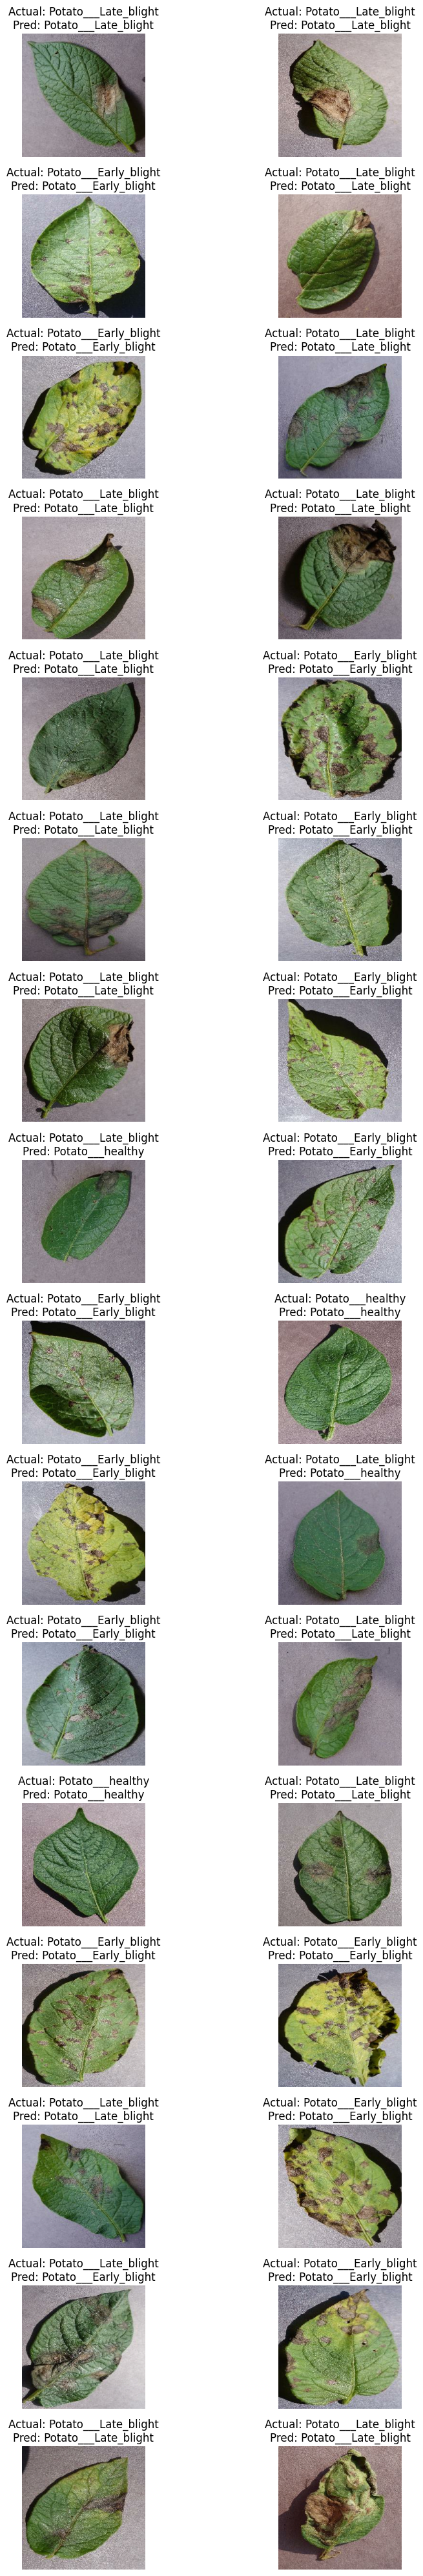

In [78]:
plt.figure(figsize=(10, 40))  
for img_batch, label_batch in test_ds.take(1):
    batch_pred = model.predict(img_batch) 
    for i in range(BATCH_SIZE):
        ax = plt.subplot(16, 2, i + 1)  
        plt.imshow(img_batch[i].numpy().astype('uint8')) 
        plt.title(f'Actual: {class_names[label_batch[i]]}\nPred: {class_names[np.argmax(batch_pred[i])]}')
        plt.axis('off') 

plt.tight_layout()
plt.show()



In [88]:
def load_and_prep_image(img_path, img_size=224):

    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    return np.expand_dims(img, axis=0)

def predict_image(model, img_path, class_names):

    img = load_and_prep_image(img_path)
    pred = model.predict(img)
    pred_class = np.argmax(pred, axis=1)
    return class_names[pred_class[0]]


In [90]:
result = predict_image(model, "C:\\Users\\Konara\\Documents\\GitHub\\DNN\\CNN\\potato disease\\PlantVillage\\Potato___Early_blight\\0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B 8001.JPG",class_names)
print(f'Predicted class: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Potato___Early_blight


In [94]:
model_version =1